<a href="https://colab.research.google.com/github/uapdhyaybipul/Computer_vision/blob/main/Keypoint_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from ultralytics import YOLO

# Load a model

model = YOLO('yolov8n-pose.pt')  # load a pretrained model (recommended for training)


# Train the model
model.predict(data='coco8-pose.yaml', epochs=100, imgsz=640)

In [2]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 kB 28.7 MB/s eta 0:00:00


In [5]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n-pose.pt')  # load an official model


# Predict with the model
source='https://ultralytics.com/images/bus.jpg'
result=model.predict(source,save=True,conf=0.5)  # predict on an image


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x480 3 persons, 318.9ms
Speed: 8.8ms preprocess, 318.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/pose/predict2


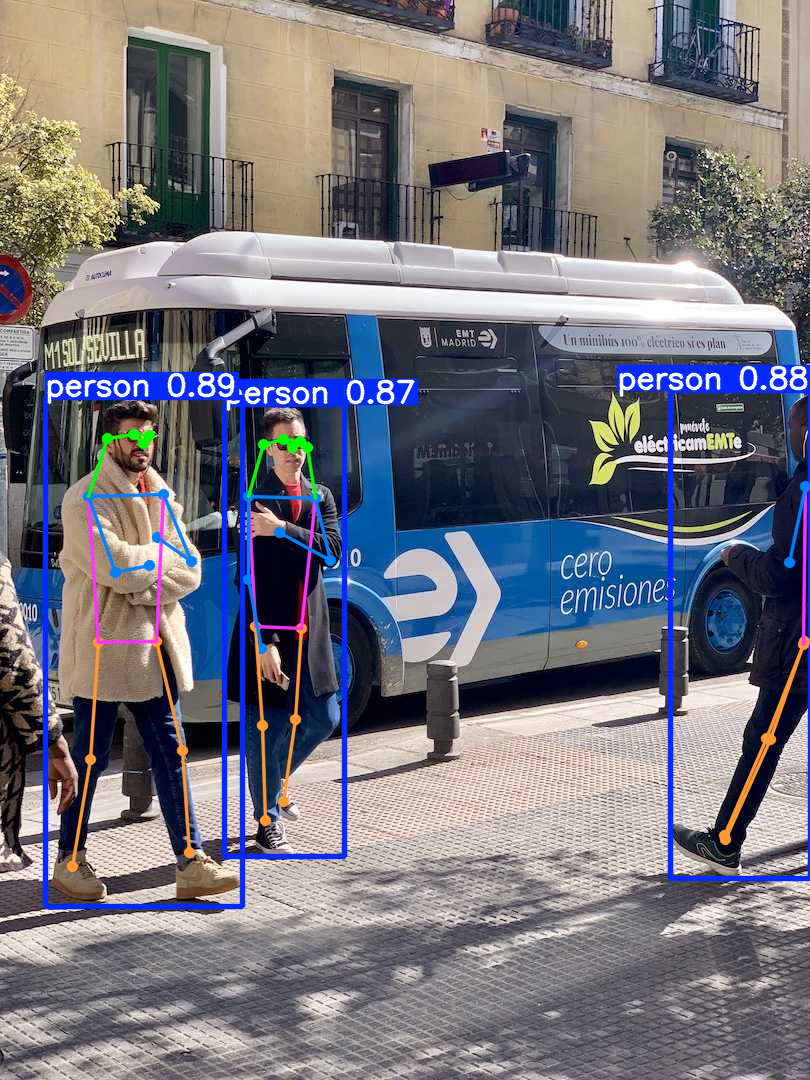

ultralytics.engine.results.Keypoints object with attributes:

conf: tensor([[0.9834, 0.9026, 0.9725, 0.4235, 0.8832, 0.9880, 0.9944, 0.9423, 0.9838, 0.9081, 0.9681, 0.9963, 0.9976, 0.9922, 0.9955, 0.9649, 0.9755],
        [0.2480, 0.2881, 0.0780, 0.4205, 0.0768, 0.6773, 0.3295, 0.5977, 0.1352, 0.4842, 0.1554, 0.7036, 0.5158, 0.7901, 0.6256, 0.6794, 0.5560],
        [0.9790, 0.9192, 0.9572, 0.6509, 0.8552, 0.9927, 0.9960, 0.9578, 0.9788, 0.9308, 0.9568, 0.9974, 0.9979, 0.9942, 0.9957, 0.9758, 0.9802]])
data: tensor([[[1.4375e+02, 4.4351e+02, 9.8343e-01],
         [1.4906e+02, 4.3515e+02, 9.0262e-01],
         [1.3369e+02, 4.3469e+02, 9.7249e-01],
         [0.0000e+00, 0.0000e+00, 4.2355e-01],
         [1.0729e+02, 4.3899e+02, 8.8325e-01],
         [1.6319e+02, 4.9433e+02, 9.8804e-01],
         [8.8729e+01, 4.9641e+02, 9.9445e-01],
         [1.9132e+02, 5.6159e+02, 9.4226e-01],
         [1.1568e+02, 5.7214e+02, 9.8376e-01],
         [1.5738e+02, 5.3759e+02, 9.0806e-01],
         [1.4947e

In [7]:
for re in result:
    boxes = re.boxes  # Boxes object for bounding box outputs
    masks = re.masks  # Masks object for segmentation masks outputs
    keypoints = re.keypoints  # Keypoints object for pose outputs
    probs = re.probs  # Probs object for classification outputs
    obb = re.obb  # Oriented boxes object for OBB outputs
    re.show()  # display to screen
    re.save(filename="result.jpg")
    print(keypoints)  # save to disk

In [16]:
keypoints = result[0].keypoints.xy
keypoints[0]

tensor([[143.7539, 443.5064],
        [149.0574, 435.1535],
        [133.6932, 434.6873],
        [  0.0000,   0.0000],
        [107.2932, 438.9888],
        [163.1885, 494.3290],
        [ 88.7293, 496.4132],
        [191.3167, 561.5870],
        [115.6809, 572.1388],
        [157.3839, 537.5920],
        [149.4724, 565.2993],
        [156.1662, 641.1912],
        [ 98.2035, 642.7625],
        [182.1680, 750.7672],
        [ 90.4629, 759.0967],
        [189.2955, 852.2170],
        [ 72.5849, 866.9703]])

In [12]:
coco_keypoints = [
    "Nose", "Left Eye", "Right Eye", "Left Ear", "Right Ear",
    "Left Shoulder", "Right Shoulder", "Left Elbow", "Right Elbow",
    "Left Wrist", "Right Wrist", "Left Hip", "Right Hip",
    "Left Knee", "Right Knee", "Left Ankle", "Right Ankle"
]

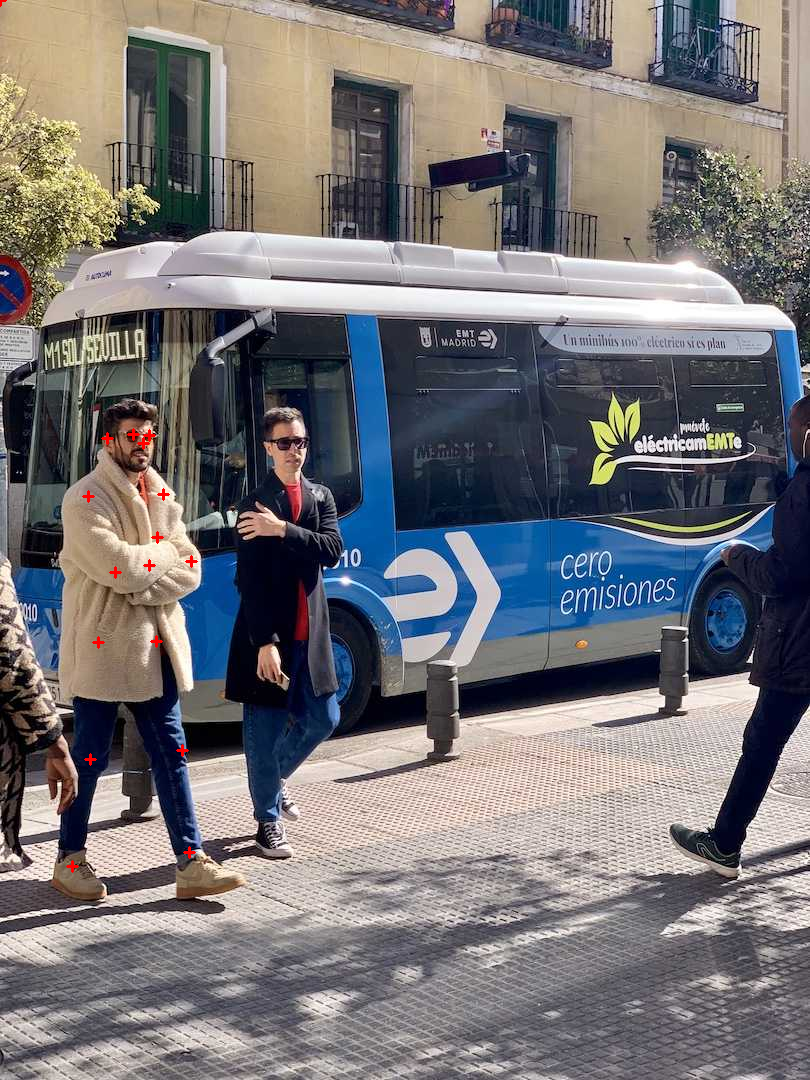

In [23]:
import cv2

def place_markers(image, coordinates, marker_color=(0, 0, 255), marker_size=10, thickness=2):
    """
    Places markers on the image at the specified coordinates.

    Parameters:
        image (np.ndarray): The input image.
        coordinates (list of tuples): List of (x, y) coordinates to place markers.
        marker_color (tuple): Color of the marker in BGR format (default is red).
        marker_size (int): Size of the marker (cross arms length).
        thickness (int): Thickness of the marker lines.

    Returns:
        np.ndarray: Image with markers drawn.
    """
    # Make a copy of the image to draw markers on
    marked_image = image.copy()

    for point in coordinates:
        x, y = int(point[0]), int(point[1])  # Ensure coordinates are integers
        # Draw a cross marker
        cv2.drawMarker(marked_image, (x, y), marker_color, markerType=cv2.MARKER_DIAMOND,
                       markerSize=marker_size, thickness=thickness)

    return marked_image


# Example usage
if __name__ == "__main__":
    # Load an image
    image_path = "/content/bus.jpg"  # Replace with the path to your image
    image = cv2.imread(image_path,cv2.IMREAD_UNCHANGED)

    # Example coordinates
    coordinates = keypoints[0]

    # Place markers on the image
    marked_image = place_markers(image, coordinates)

    # Display the image
    cv2_imshow( marked_image)



In [20]:
from google.colab.patches import cv2_imshow

In [ ]:
for point in coordinates:
  x, y = int(point[0]), int(point[1])